In [1]:
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt

infile='/Users/irffanalahi/Research/from_irf2_account/for_052622/for_052622/Deconresult_gt/all_melanoma_cfDNA_v2.xlsx'

celltype='Mono'
the_sheet_name='Major Lineage SM'
outfile=infile+"_"+the_sheet_name+"_zscore"

indf=pd.read_excel(open(infile, 'rb'),sheet_name=the_sheet_name,index_col='Mixture')
indf.head()

,CD4,CD8,NK,Mono,Bcell,Total,Response,Toxicity,Batch,Sequencing Technology
Mixture,,,,,,,,,,
YUTACI,7.537161,7.654764,13.717121,64.967443,6.123511,100.0,DCB,0.0,1,BS-seq
YUTORY,13.739127,11.347472,18.417407,44.519744,11.976250,100.0,NDB,3.0,1,BS-seq
YULENIO,12.929012,7.551904,13.729540,57.912697,7.876848,100.0,DCB,NaN,1,BS-seq
YUAMIGO,12.069571,11.975249,16.094739,51.785331,8.075110,100.0,DCB,3.0,1,BS-seq
YUZIRG,9.958169,11.016241,18.783299,52.618689,7.623601,100.0,NDB,0.0,1,BS-seq


In [2]:
columnsfornormalization=['Naive CD4 T', 'Naive CD8', 'Naive B', 'NK', 'Mono','Mac (M0)', 'Mac (M1)', 'Mac (M2)', 'iDC', 'mDC', 'PMN', 'CD8 TCM','CD8 TEM', 'Eosinophil', 'Tregs', 'CD4 TEM', 'CD8 TEMRA','Megakaryocyte', 'CD4 TCM', 'Erythrocyte', 'Memory B', 'CD8TIL','CD4','CD8','Bcell','MelTumor']

DCB v.s. NDB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.634e-02 U_stat=5.810e+02


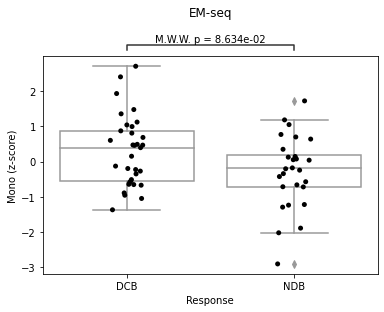

DCB v.s. NDB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.449e-02 U_stat=8.100e+01


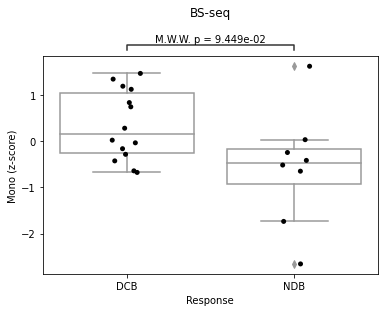

In [3]:
sequencing_technology=list(set(indf['Sequencing Technology'].tolist()))
sequencing_technology
zscore_dflist=[]
for st in sequencing_technology:
    zscoredDF=indf[indf['Sequencing Technology']==st].copy()
    for col in columnsfornormalization:
        if col in indf.columns.tolist():
            zscoredDF[col] = (zscoredDF[col] - zscoredDF[col].mean())/zscoredDF[col].std(ddof=0)
    
    zscore_dflist.append(zscoredDF)
    

    plt.figure()
    y=celltype
    x='Response'
    order=['DCB','NDB']
    currentdf=zscoredDF
    ax=sns.boxplot(x=x, y=y, data=currentdf,order=order,color='white')
    ax=sns.stripplot(x=x, y=y, data=currentdf,order=order,color='black')
    ax.set_ylabel(y+" (z-score)")
    
    plt.title(st, pad=40)
    
    add_stat_annotation(ax,x=x, y=y, data=currentdf,box_pairs=[('DCB','NDB')],test='Mann-Whitney', text_format='full', loc='outside')
    plt.savefig(outfile +'_'+st+ '_zscore_'+x+'_'+y+'.pdf', bbox_inches='tight')
    #plt.close()
    plt.show()

In [4]:
zscore_dflistDF=pd.concat(zscore_dflist)

zscore_dflistDF.to_csv(outfile+".txt",sep='\t')

DCB v.s. NDB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.710e-02 U_stat=1.106e+03


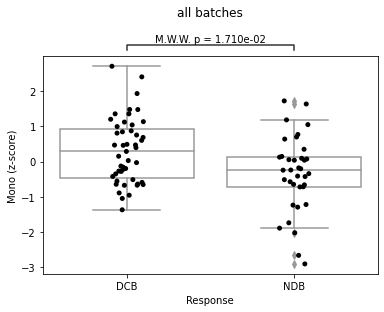

In [5]:
plt.figure()
y=celltype
x='Response'
order=['DCB','NDB']
currentdf=zscore_dflistDF
ax=sns.boxplot(x=x, y=y, data=currentdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=currentdf,order=order,color='black')
ax.set_ylabel(y+" (z-score)")

plt.title('all batches', pad=40)

add_stat_annotation(ax,x=x, y=y, data=currentdf,box_pairs=[('DCB','NDB')],test='Mann-Whitney', text_format='full', loc='outside')
plt.savefig(outfile +'_ALL_' '_zscore_'+x+'_'+y+'.pdf', bbox_inches='tight')
#plt.close()
plt.show()